In [1]:
from architecture import nn, CrossEntropy
from adam import Adam
import numpy as np
from torchvision import datasets, transforms # the only slight cheat I gave myself
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
batch_size = 64
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.1307, 0.3081)]) #mean and std of MNIST
train_set = datasets.MNIST(root = './data', train = True, transform= transform)
test_set = datasets.MNIST(root='./data', train=False, transform=transform)
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

In [3]:
def log_gradient_norms(model):
    # This function iterates through all parameters and logs their gradient norms.
    grad_norms = []
    for i, (param, grad) in enumerate(model.parameters()):
        norm = np.linalg.norm(grad)
        grad_norms.append(norm)
    print("Gradient norms per parameter:", grad_norms)

In [4]:
model = nn()
criterion = CrossEntropy()
optimizer = Adam(model.parameters())


In [ ]:
num_epochs = 25
losses = []
accuracies = []

for epoch in tqdm(range(num_epochs), desc = "Epochs"):

    # keep track of totals to average later for logging metrics
    total_loss = 0
    total_correct = 0
    total = 0
    for images, labels in tqdm(iter(train_loader), desc = "data_loader", total = len(train_loader), leave = False):

        images = images.numpy().reshape(batch_size, -1)
        labels = labels.numpy()
        if images.shape[1] != 784:
            continue
        logits = model.forward(images)
        total_loss += criterion.calculate_loss(logits, labels)
        delta = criterion.backward()
        model.backward(delta)
        optimizer.step()

        # check how many times the most probable class was the correct class
        preds = np.argmax(logits, axis = 1)
        total_correct += (preds == labels).sum()
        total += batch_size
    
    avg_loss = total_loss / len(train_loader)
    print("loss: ", avg_loss)
    accuracy = total_correct / total
    print("accuracy: ", accuracy)
    losses.append(avg_loss)
    accuracies.append(accuracy)

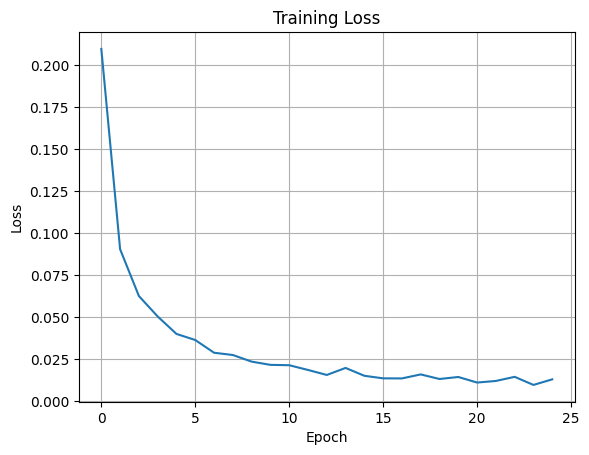

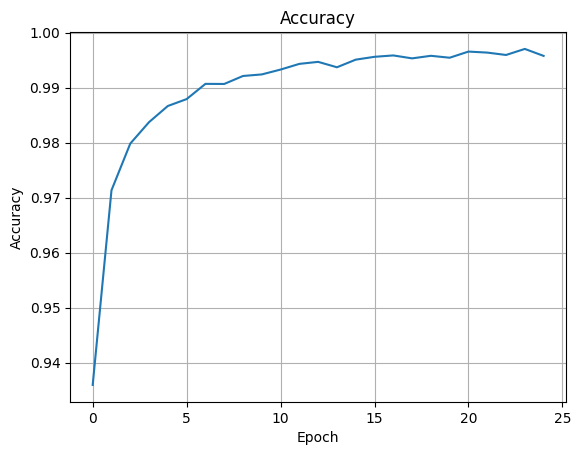

In [ ]:
# Plot training loss and accuracy
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

plt.plot(accuracies)
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [16]:
# Validation loops
total_correct = 0
total = 0
for images, labels in test_loader:
    images = images.numpy().reshape(batch_size, -1)
    labels = labels.numpy()
    if images.shape[1] != 784:
        continue
    logits = model.forward(images)
    preds = np.argmax(logits, axis = 1)
    total_correct += (preds == labels).sum()
    total += batch_size
print("Test accuracy: ", total_correct / total)


Test accuracy:  0.9741586538461539


Total misclassified: 258
Total classified:  9984


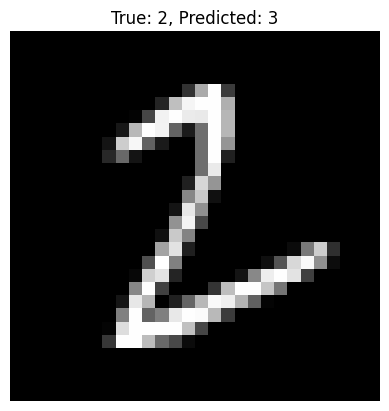

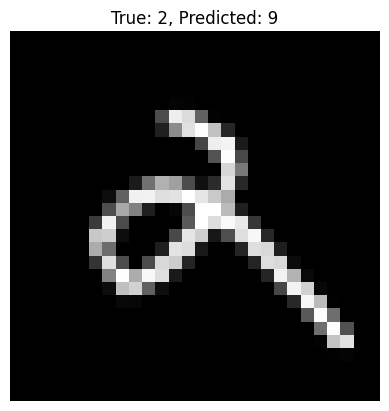

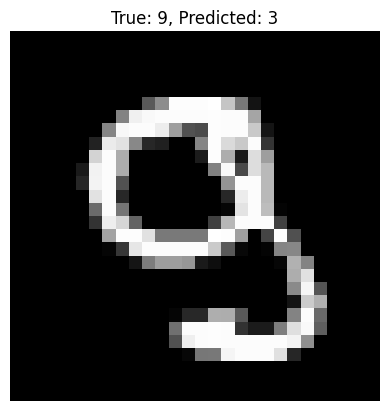

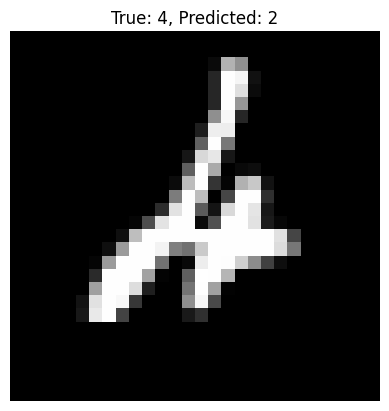

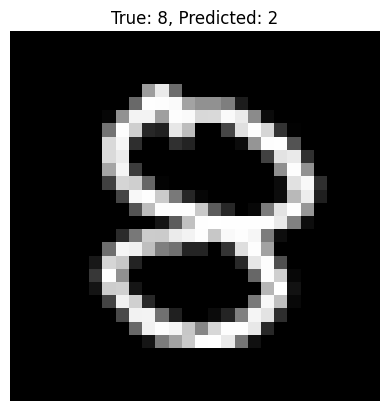

In [17]:
misclassified_images = []
misclassified_true = []
misclassified_pred = []

# iterate through the test_loader
for images, labels in test_loader:
    # convert images to numpy arrays and reshape to (batch, 784)
    images_np = images.numpy().reshape(images.shape[0], -1)
    labels_np = labels.numpy()
    
    # forward pass through the model
    logits = model.forward(images_np)
    preds = np.argmax(logits, axis=1)
    
    # identify misclassified images and store them
    for i in range(len(labels_np)):
        if preds[i] != labels_np[i]:
            # Store the image in original 28x28 shape
            misclassified_images.append(images[i].numpy().squeeze())
            misclassified_true.append(labels_np[i])
            misclassified_pred.append(preds[i])

# print the total misclassified count
print("Total misclassified:", len(misclassified_images))
print("Total classified: ", total)
# visualize the first few misclassified images
for i in range(5):
    img = misclassified_images[i]
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {misclassified_true[i]}, Predicted: {misclassified_pred[i]}")
    plt.axis('off')
    plt.show()


69952
